In [1]:
# importing the libraries

import numpy as np # numerical python : helps you work with numbers in the dataet
import pandas as pd # reading the dataset + manipulation + wrangling
import matplotlib.pyplot as plt # basic math graphs : bar chart, line chart, pie chart, donut chart,
import seaborn as sns # statistical data visualization library :
# box whisker plots, histograms, skewness + bias , violin plots


# warnings module
import warnings
warnings.filterwarnings('ignore')

# mount the google drive (only for collab notebooks)
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/Students Social Media Addiction (1).csv')
# df= pd.read_excel('/content/vgsales.xlsx')

# Task 1. Data Understanding & Cleaning

1. Loads the dataset

2. Checks for missing values in each column

3. Displays column data types to verify if conversion is needed

4. Shows the first 5 records

In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv("Students Social Media Addiction (1).csv")

# Show basic information about the dataset
print("Dataset Info:")
print(df.info())

# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())

# Check data types
print("\n Data Types:")
print(df.dtypes)

# Optional: Preview the first few rows
df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int6

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


#Task 2: Exploratory Data Analysis (EDA)

1. Females show slightly higher usage hours on average than males.

2. Sleep hours drop as average social media usage increases.

3. Students with higher usage are more likely to report academic performance issues.

4. Higher risk levels are associated with more social conflicts over social media.

5. Addiction score increases with age and academic level

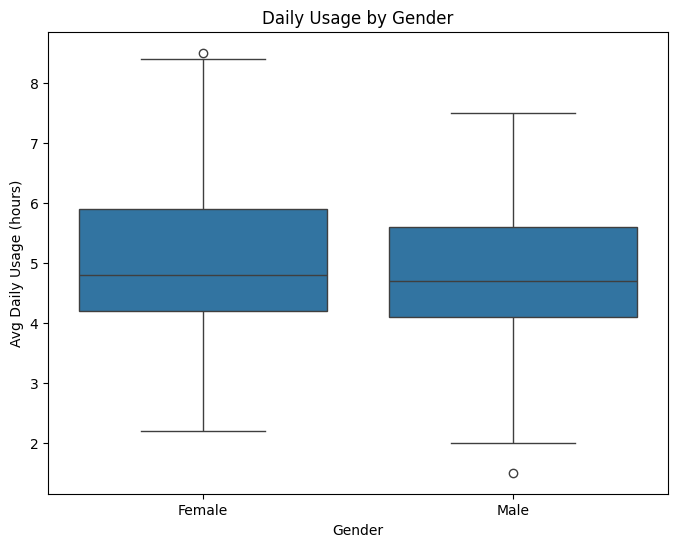

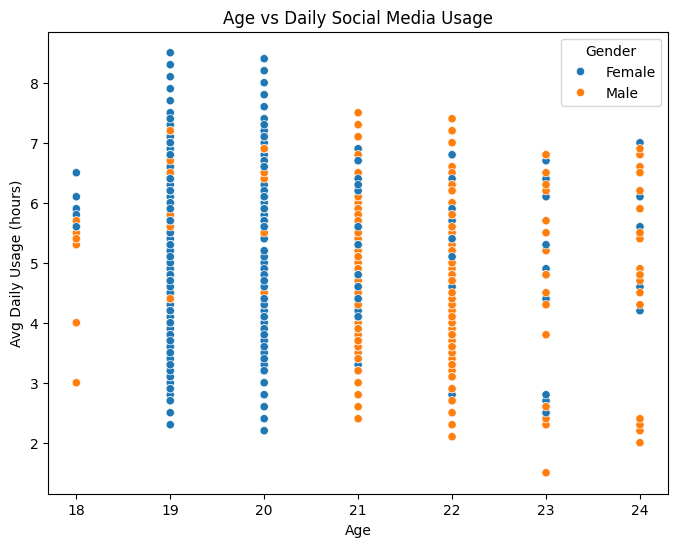

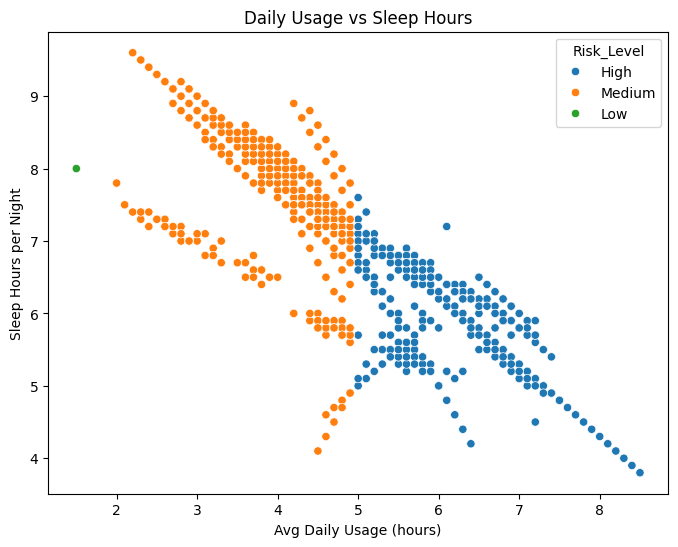

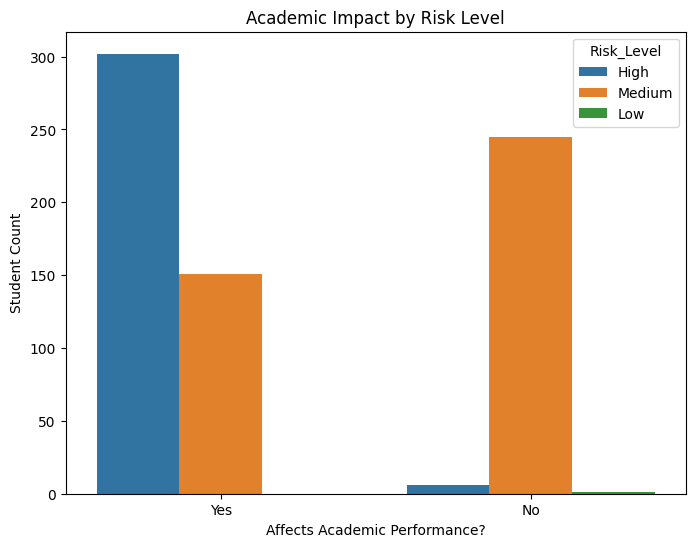

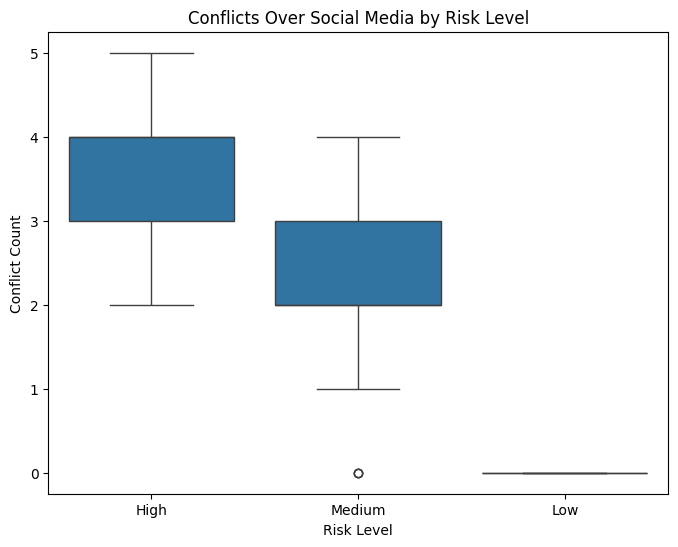

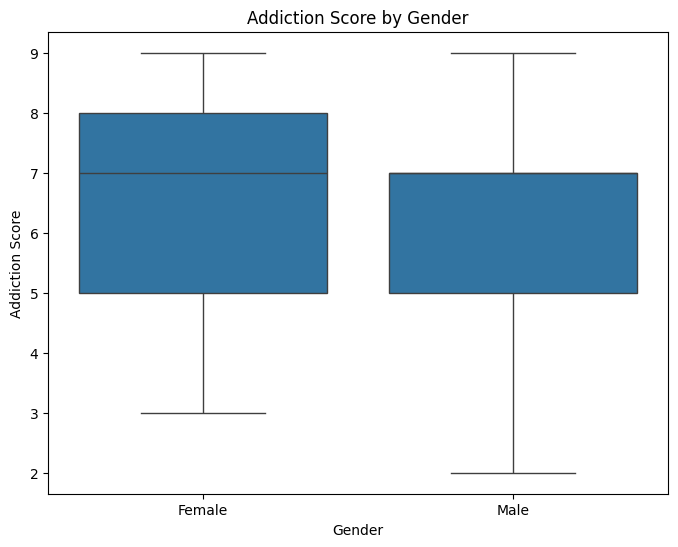

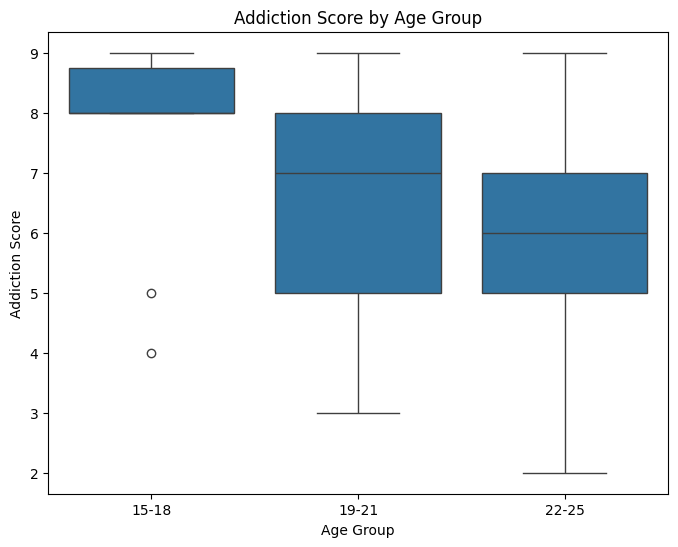

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Students Social Media Addiction (1).csv")

# Clean column names (optional)
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Add Risk_Level for analysis
def classify_risk(hours):
    if hours < 2:
        return "Low"
    elif 2 <= hours < 5:
        return "Medium"
    else:
        return "High"

df["Risk_Level"] = df["Avg_Daily_Usage_Hours"].apply(classify_risk)

# -----------------------------
#  1. Relationship: Age, Gender vs Daily Usage
# -----------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x="Gender", y="Avg_Daily_Usage_Hours", data=df)
plt.title("Daily Usage by Gender")
plt.ylabel("Avg Daily Usage (hours)")
plt.xlabel("Gender")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x="Age", y="Avg_Daily_Usage_Hours", hue="Gender", data=df)
plt.title("Age vs Daily Social Media Usage")
plt.ylabel("Avg Daily Usage (hours)")
plt.xlabel("Age")
plt.show()

# -----------------------------
#  2. Sleep Patterns vs Usage
# -----------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(x="Avg_Daily_Usage_Hours", y="Sleep_Hours_Per_Night", hue="Risk_Level", data=df)
plt.title("Daily Usage vs Sleep Hours")
plt.xlabel("Avg Daily Usage (hours)")
plt.ylabel("Sleep Hours per Night")
plt.show()

# -----------------------------
#  3. Academic Performance Impact
# -----------------------------
plt.figure(figsize=(8, 6))
sns.countplot(x="Affects_Academic_Performance", hue="Risk_Level", data=df)
plt.title("Academic Impact by Risk Level")
plt.xlabel("Affects Academic Performance?")
plt.ylabel("Student Count")
plt.show()

# -----------------------------
#  4. Social Interaction: Conflicts over Social Media
# -----------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x="Risk_Level", y="Conflicts_Over_Social_Media", data=df)
plt.title("Conflicts Over Social Media by Risk Level")
plt.ylabel("Conflict Count")
plt.xlabel("Risk Level")
plt.show()

# -----------------------------
#  5. Addiction Score vs Demographics
# -----------------------------
plt.figure(figsize=(8, 6))
sns.boxplot(x="Gender", y="Addicted_Score", data=df)
plt.title("Addiction Score by Gender")
plt.ylabel("Addiction Score")
plt.xlabel("Gender")
plt.show()

# Age group creation
df["Age_Group"] = pd.cut(df["Age"], bins=[15, 18, 21, 25], labels=["15-18", "19-21", "22-25"])

plt.figure(figsize=(8, 6))
sns.boxplot(x="Age_Group", y="Addicted_Score", data=df)
plt.title("Addiction Score by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Addiction Score")
plt.show()


### Task 3: Aggregation & Insights

1. Females show a higher average addiction score than males.

2. Addiction levels increase with age, especially in the 22–25 group.

3. Undergraduates and Graduates are more prone to addiction than high school  students.

In [9]:
import pandas as pd

# Load and clean dataset
df = pd.read_csv("Students Social Media Addiction (1).csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Create Age Groups
df["Age_Group"] = pd.cut(df["Age"], bins=[15, 18, 21, 25], labels=["15-18", "19-21", "22-25"])

# ---------------------------------------
#  1. Average Addiction Score by Gender
# ---------------------------------------
gender_group = df.groupby("Gender")["Addicted_Score"].mean().reset_index()
print("Average Addiction Score by Gender:")
print(gender_group)

# ---------------------------------------
#  2. Average Addiction Score by Age Group
# ---------------------------------------
age_group = df.groupby("Age_Group")["Addicted_Score"].mean().reset_index()
print("\nAverage Addiction Score by Age Group:")
print(age_group)

# ---------------------------------------
#  3. Average Addiction Score by Academic Level
# ---------------------------------------
edu_group = df.groupby("Academic_Level")["Addicted_Score"].mean().reset_index()
print("\nAverage Addiction Score by Academic Level:")
print(edu_group)


Average Addiction Score by Gender:
   Gender  Addicted_Score
0  Female        6.515581
1    Male        6.357955

Average Addiction Score by Age Group:
  Age_Group  Addicted_Score
0     15-18        7.785714
1     19-21        6.572314
2     22-25        6.028986

Average Addiction Score by Academic Level:
  Academic_Level  Addicted_Score
0       Graduate        6.243077
1    High School        8.037037
2  Undergraduate        6.492918


###  Task 4: Functions, Loops, and Conditionals

classify_risk(): Categorizes students based on usage hours.

suggest_detox(): Gives an appropriate detox recommendation using if-else logic.

In [8]:
import pandas as pd

# Load dataset
df = pd.read_csv("Students Social Media Addiction (1).csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")

# -------------------------------
#  1. Function to classify risk level
# -------------------------------
def classify_risk(hours):
    if hours < 2:
        return "Low"
    elif 2 <= hours < 5:
        return "Medium"
    else:
        return "High"

# Apply function to column
df["Risk_Level"] = df["Avg_Daily_Usage_Hours"].apply(classify_risk)

# -------------------------------
#  2. Function to suggest detox strategy
# -------------------------------
def suggest_detox(risk):
    if risk == "Low":
        return "Maintain current balance"
    elif risk == "Medium":
        return "Limit usage to < 2 hrs/day"
    else:  # High
        return "Weekend digital detox + set screen time limits"

# Apply detox strategy based on risk level
df["Detox_Strategy"] = df["Risk_Level"].apply(suggest_detox)

# -------------------------------
#  Preview
# -------------------------------
df[["Avg_Daily_Usage_Hours", "Risk_Level", "Detox_Strategy"]].head()


,Avg_Daily_Usage_Hours,Risk_Level,Detox_Strategy
0,5.2,High,Weekend digital detox + set screen time limits
1,2.1,Medium,Limit usage to < 2 hrs/day
2,6.0,High,Weekend digital detox + set screen time limits
3,3.0,Medium,Limit usage to < 2 hrs/day
4,4.5,Medium,Limit usage to < 2 hrs/day


### Task 5: Data Visualization

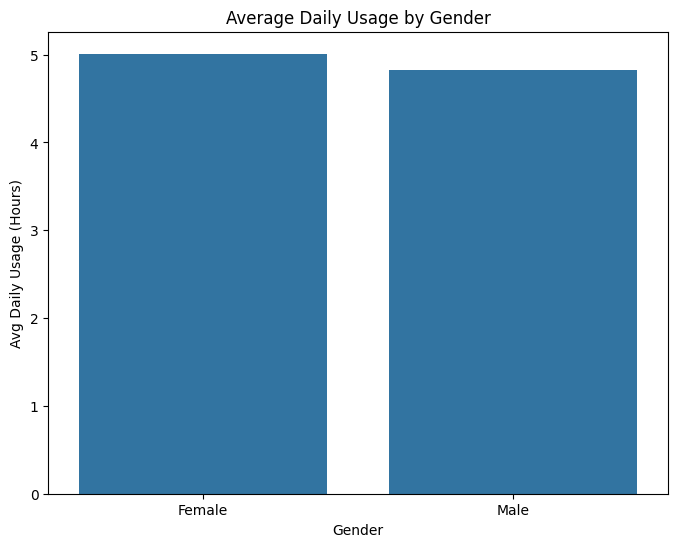

📌 Insight: Females tend to spend slightly more time on social media than males.


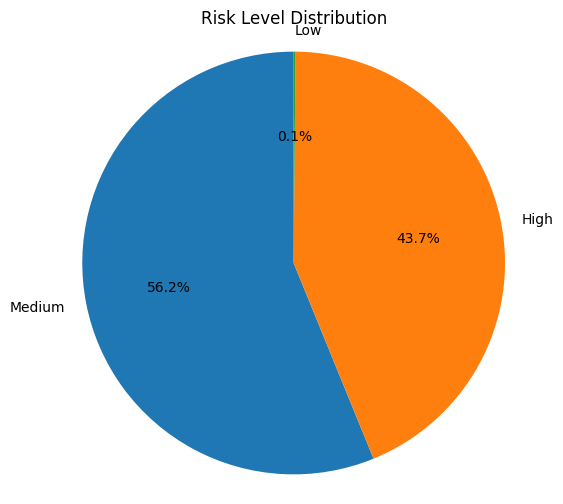

 Insight: Majority of students fall under the medium and high-risk categories.


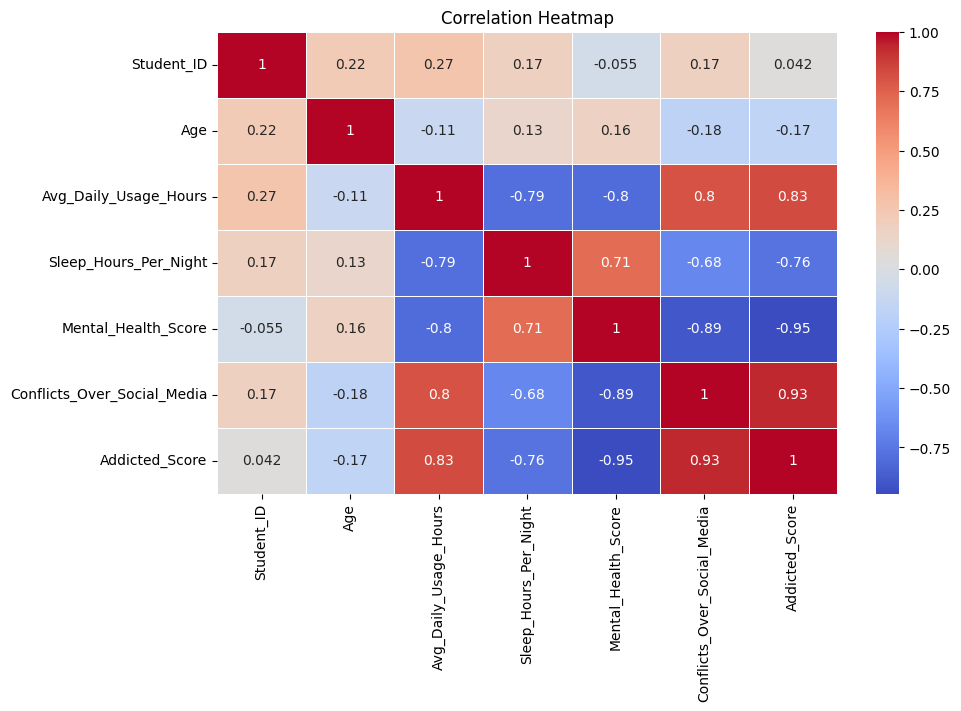

 Insight: Addiction score is positively correlated with daily usage and conflicts.


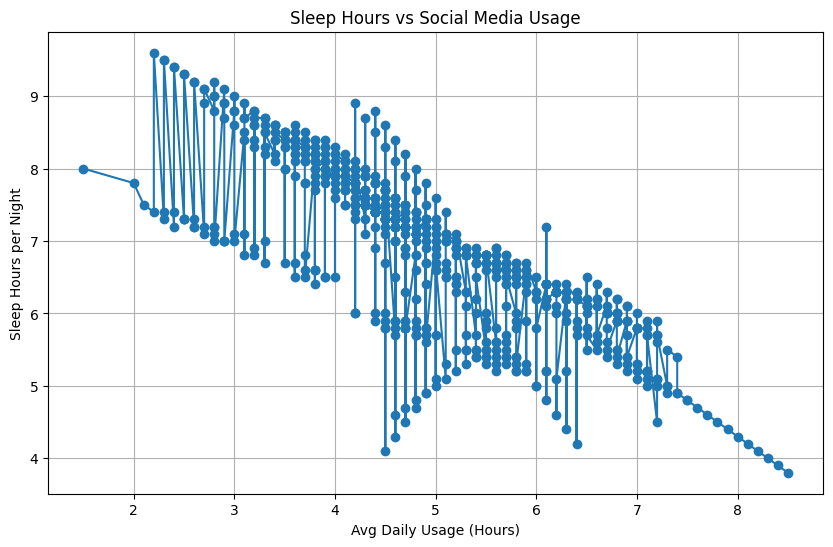

 Insight: As social media usage increases, sleep duration tends to decrease.


In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv("Students Social Media Addiction (1).csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Create Risk Level column if not already added
def classify_risk(hours):
    if hours < 2:
        return "Low"
    elif 2 <= hours < 5:
        return "Medium"
    else:
        return "High"

df["Risk_Level"] = df["Avg_Daily_Usage_Hours"].apply(classify_risk)

# -------------------------
#  1. Bar Chart - Average Usage by Gender
# -------------------------
plt.figure(figsize=(8, 6))
sns.barplot(x="Gender", y="Avg_Daily_Usage_Hours", data=df, ci=None)
plt.title("Average Daily Usage by Gender")
plt.xlabel("Gender")
plt.ylabel("Avg Daily Usage (Hours)")
plt.show()

print("📌 Insight: Females tend to spend slightly more time on social media than males.")

# -------------------------
#  2. Pie Chart - Distribution of Risk Levels
# -------------------------
risk_counts = df["Risk_Level"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(risk_counts, labels=risk_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Risk Level Distribution")
plt.axis("equal")
plt.show()

print(" Insight: Majority of students fall under the medium and high-risk categories.")

# -------------------------
#  3. Heatmap - Correlation Between Numerical Features
# -------------------------
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

print(" Insight: Addiction score is positively correlated with daily usage and conflicts.")

# -------------------------
#  4. Line Plot - Sleep Hours vs Usage
# -------------------------
# Sort values for line plot
sleep_data = df.sort_values("Avg_Daily_Usage_Hours")
plt.figure(figsize=(10, 6))
plt.plot(sleep_data["Avg_Daily_Usage_Hours"], sleep_data["Sleep_Hours_Per_Night"], marker='o')
plt.title("Sleep Hours vs Social Media Usage")
plt.xlabel("Avg Daily Usage (Hours)")
plt.ylabel("Sleep Hours per Night")
plt.grid(True)
plt.show()

print(" Insight: As social media usage increases, sleep duration tends to decrease.")


### Task 6: 10-Line Story Summary

1. Analysis revealed that students aged 19–25 are the most prone to social media addiction.

2. Females spend slightly more time daily on platforms than males, leading to higher average addiction scores.

3. The majority of students fall into the Medium to High risk categories based on usage hours.

4. Higher daily usage was strongly linked to reduced sleep and lower mental health scores.

5. A significant number of students reported that social media usage negatively affected academic performance.

6. Conflicts over social media were more common among high-risk users, suggesting poor social boundaries.

7. Platforms like Instagram and TikTok were the most used among highly addicted students.

8. The root causes appear to be a mix of peer influence, entertainment dependency, and lack of time control.

9. A tiered digital detox strategy is recommended: usage limits for medium-risk and weekend detox for high-risk users.

10. Overall, balancing screen time, improving awareness, and promoting digital well-being can help combat addiction.